In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import os
import glob
%matplotlib inline

In [38]:
# Load the data from the KL computations
data_path = "/home/brad/DailyLog/2017110"
with open(data_path, "rb") as f:
    data_and_params = pickle.load(f)

In [39]:
KL_div_full = data_and_params[0]
betas = data_and_params[1]
dims = data_and_params[2]
stims = data_and_params[3]
Ntrials = data_and_params[4]

# KL_div_full is Nstim x Nstim x Ntrials^2 x Ndims x Nbetas
# average over trials!
KL_div_trialavg = np.mean(KL_div_full, axis = 2)

# Symmetrize
# Now it's Nstim x Nstim x Ndims x Nbetas
KL_div_trialavg_sym = (KL_div_trialavg + np.transpose(KL_div_trialavg, axes=(1,0,2,3)))/2

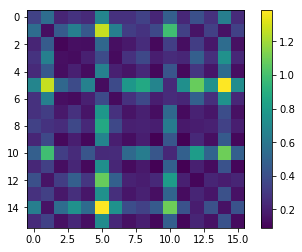

In [40]:
# show the matrix
plt.imshow(KL_div_trialavg_sym[:, :, 0, -1])
plt.colorbar()

In [41]:
# Do Hierarchical clustering
def pyslsa_HC(full_dist_mat, stims):
    
    # compute reduced density mat
    dist_mat = squareform(full_dist_mat, checks=False)
    # Compute and plot first dendrogram.
    fig = plt.figure(figsize=(8,8))
    # x ywidth height
    ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
    Y = linkage(dist_mat, method='single')
    Z1 = dendrogram(Y, orientation='left',labels=stims) # adding/removing the axes
    ax1.set_xticks([])

    # Compute and plot second dendrogram.
    ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
    Z2 = dendrogram(Y)
    ax2.set_xticks([])
    ax2.set_yticks([])

    #Compute and plot the heatmap
    axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
    idx1 = Z1['leaves']
    idx2 = Z2['leaves']
    D = squareform(dist_mat, checks=False)
    D = D[idx1,:]
    D = D[:,idx2]
    im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
    plt.colorbar(im, cax=axcolor)


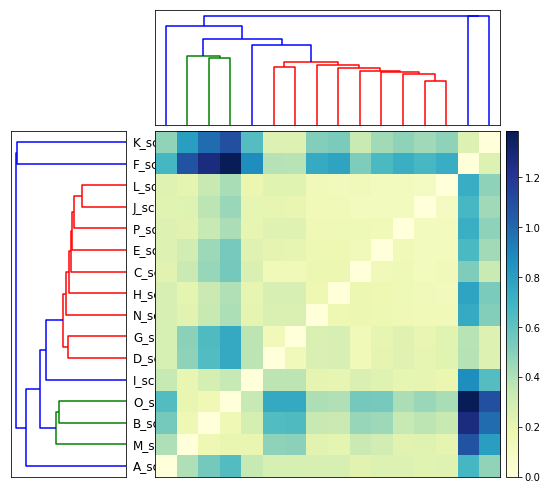

In [45]:
pyslsa_HC(KL_div_trialavg_sym[:, :, 0, -1], stims)

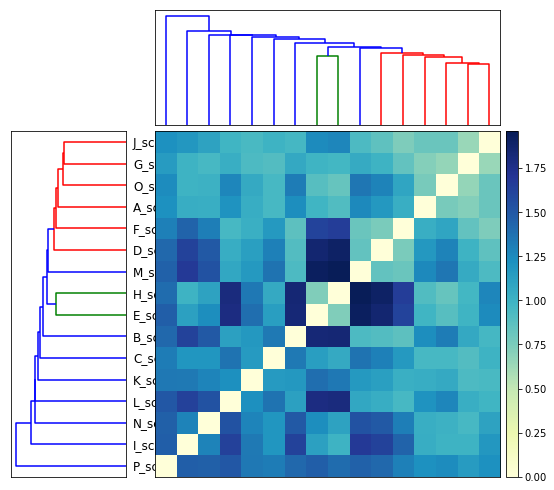

In [35]:
pyslsa_HC(KL_div_trialavg_sym[:, :, 0, 0], stims)